
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:5px 10px; padding: 20px">Exploratory Data Analysis(EDA)</p>


# <b><span style='color:#ff6200'>Importing Dependencies </span></b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



# <b><span style='color:#ff6200'> Library version </span></b>

In [2]:
print("pandas version:" ,pd.__version__)
print("numpy version:",np.__version__)
print("seaborn version:",sns.__version__)

pandas version: 1.5.3
numpy version: 1.24.0
seaborn version: 0.12.2


In [3]:
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')


# <b><span style='color:#ff6200'> Importing Dataset </span></b>

In [4]:
original_customers_df = pd.read_csv("dataset/Customers.csv")
original_products_df = pd.read_csv("dataset/Products.csv")
original_transactions_df = pd.read_csv("dataset/Transactions.csv")


# <b><span style='color:#ff6200'> Creating a Copy of the Original DataFrame </span></b>

[safe practice]

In [5]:
customers_df = original_customers_df
products_df = original_products_df
transactions_df = original_transactions_df


# <b><span style='color:#ff6200'> Exploring the Customer Dataset </span></b>

In [6]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
customers_df.info()

# Check for missing values
customers_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [8]:
customers_df.duplicated().sum()

0

In [9]:
# Convert SignupDate column to datetime format
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"])

customers_df.dtypes


CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object


# <b><span style='color:#ff6200'> Customer Distribution by Region </span></b>

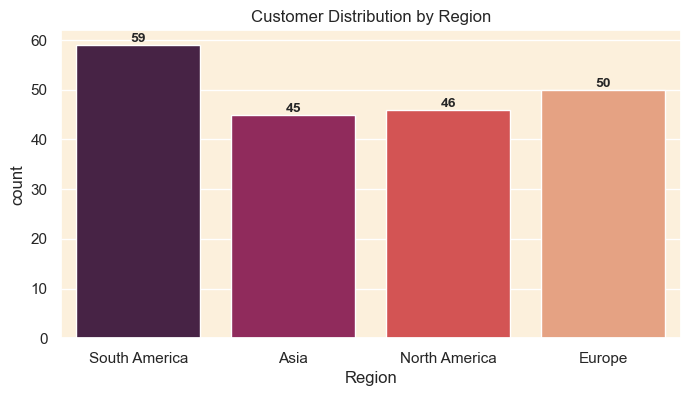

In [10]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=customers_df, x="Region", palette="rocket")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Customer Distribution by Region")
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

### **Insights from Customer Data Exploration**

- **No Missing Values:** The Customers dataset does not contain any null values.  
- **No Duplicates:** There are no duplicate records in the dataset.  
- **Customer Distribution by Region:**  
  - **South America:** 59 customers  
  - **Asia:** 45 customers  
  - **North America:** 46 customers  
  - **Europe:** 50 customers  
- "The customer distribution across regions appears **fairly balanced, with no significant skewness."**



# <b><span style='color:#ff6200'> Exploring Products Dataset </span></b>

In [11]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [12]:
products_df.info()

# Check for missing values
products_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [13]:
products_df.duplicated().sum()

0


# <b><span style='color:#ff6200'> Product Distribution by Category </span></b>

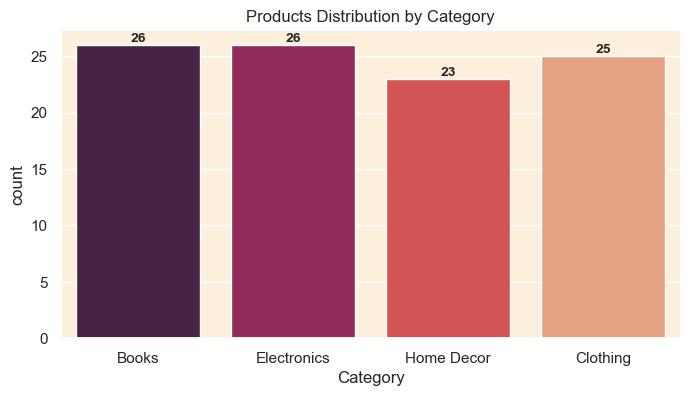

In [14]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=products_df, x="Category", palette="rocket")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Products Distribution by Category")
plt.show()

In [15]:
products_df["Price"].describe()

count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

### **Insights from Products Data Exploration**  

- ✅ **No Missing Values:** The Products dataset does not contain any null values.  
- ✅ **No Duplicates:** There are no duplicate records in the dataset.  

#### **📦 Product Distribution by Category:**  
- **Books:** 26 Products  
- **Electronics:** 26 Products  
- **Home Decor:** 23 Products  
- **Clothing:** 25 Products  

📊 **Balanced Distribution:**  
- The product distribution across categories appears **fairly balanced**, with no significant skewness.  

💰 **Wide Price Range:**  
- Product prices vary significantly, from **\$16.08** to **\$497.76**, indicating a mix of **budget and premium products**.  



# <b><span style='color:#ff6200'> Exploring TransactionsDataset </span></b>

In [16]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [17]:
transactions_df.info()

# Check for missing values
transactions_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [18]:
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])
transactions_df.dtypes

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object

In [19]:
start_date= transactions_df["TransactionDate"].min()
end_date= transactions_df["TransactionDate"].max()
print(f"we have data from {start_date} to {end_date}")

we have data from 2023-12-30 15:29:12 to 2024-12-28 11:00:00


In [20]:
transactions_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

### * Insight from Transactions Data**  

- We have **1,000 transactions** recorded in the dataset.  
- The **TransactionDate** column needs to be **converted to datetime format** for accurate time-based analysis.  
- **No missing values** were found in the transaction data, ensuring data completeness.  
- we have data from **2023-12-30**  to **2024-12-28**.


# <b><span style='color:#ff6200'> Outliers </span></b>

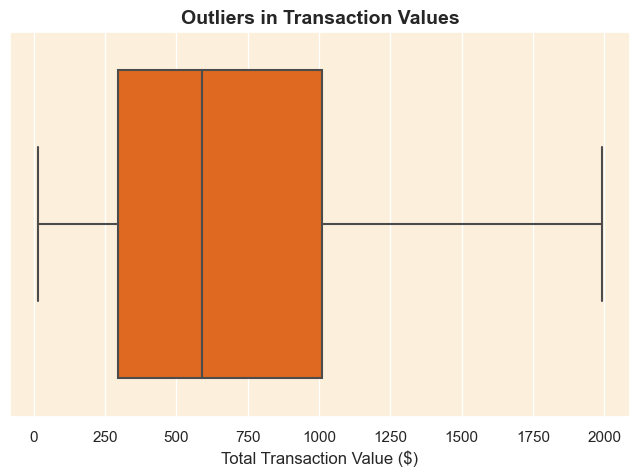

In [21]:
# Boxplot for TotalValue to detect anomalies
plt.figure(figsize=(8, 5))
sns.boxplot(x=transactions_df['TotalValue'], color='#ff6200')
plt.title("Outliers in Transaction Values", fontsize=14, fontweight='bold')
plt.xlabel("Total Transaction Value ($)", fontsize=12)
plt.show()



# <b><span style='color:#ff6200'> Business Insights </span></b>


# <b><span style='color:#ff6200'> Monthly Transactions Trends </span></b>

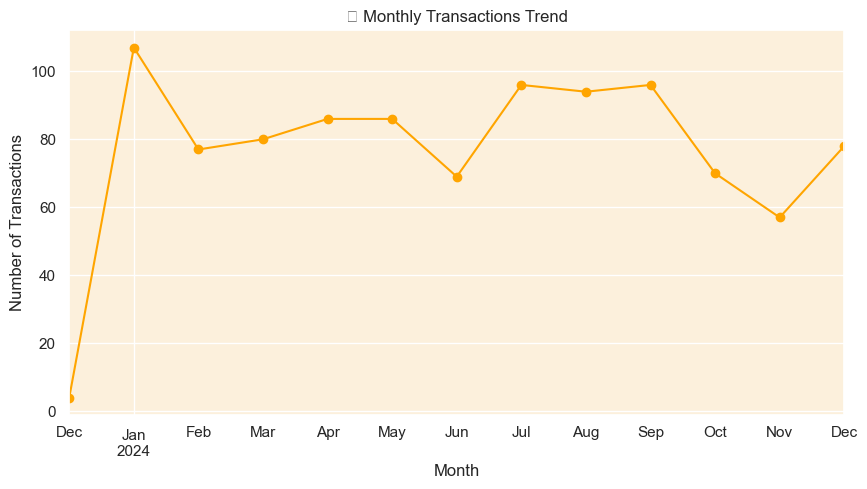

In [22]:
# Group by month and count transactions
transactions_df['Month'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_trend = transactions_df.groupby('Month')['TransactionID'].count()

# Plot
plt.figure(figsize=(10, 5))
monthly_trend.plot(kind='line', marker='o', color='orange')
plt.title("📅 Monthly Transactions Trend")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

### ** Transaction Trends (2024)**  

- **January 2024** recorded **100+ transactions**, the highest of the year.  
- **November 2024** had the **lowest number of transactions**.  
- **July, August, and September 2024** each saw **90+ transactions**, indicating steady sales during these months.  



# <b><span style='color:#ff6200'> Most Popular Product </span></b>

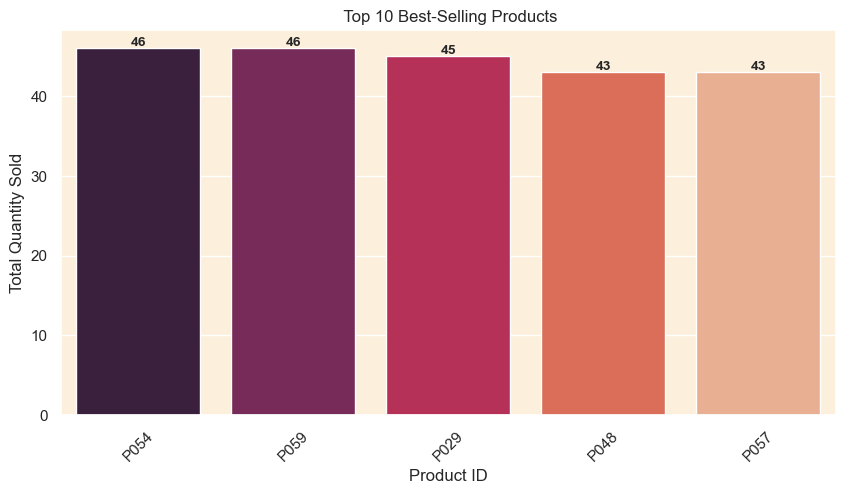

In [23]:

# Group by ProductID and sum quantity sold
top_products = transactions_df.groupby('ProductID')['Quantity'].sum().nlargest(5)

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_products.index, y=top_products.values, palette="rocket")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title(" Top 10 Best-Selling Products")
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()


In [24]:
products = products_df.loc[products_df['ProductID'].isin(['P054','P058','P029','P048','P057']), ['ProductID', 'ProductName']]

# Display the result
print(products)

   ProductID            ProductName
28      P029     TechPro Headphones
47      P048       TechPro Cookbook
53      P054     SoundWave Cookbook
56      P057  ActiveWear Smartphone
57      P058    ActiveWear Textbook



# <b><span style='color:#ff6200'> Monthly Total Sales Trend </span></b>

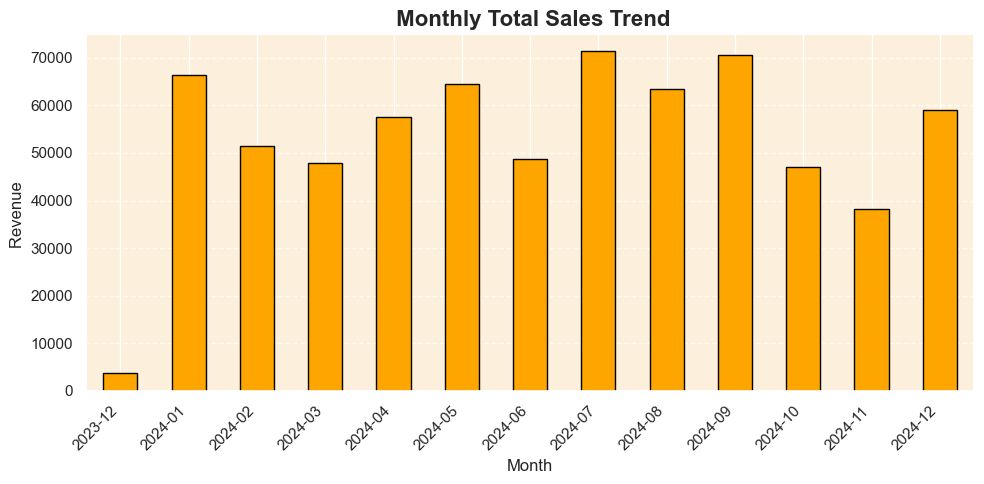

In [25]:
monthly_trend = transactions_df.groupby('Month')['TotalValue'].sum()

# Plot
plt.figure(figsize=(10, 5))
monthly_trend.plot(kind='bar', color='orange', edgecolor='black')  # Bar plot with custom color
plt.title(" Monthly Total Sales Trend", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue ", fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

###  Monthly Sales Insights 

- The **highest sales** were recorded in **July** and **September 2024**, each with **$70,000** in sales.  
- The **lowest sales** were recorded in **November 2024**, marking a drop in transactions during that month.  
- Data for **December** starts from **30th December**, so it cannot be considered for the lowest sales comparison.



# <b><span style='color:#ff6200'> Product Distribution By Category </span></b>

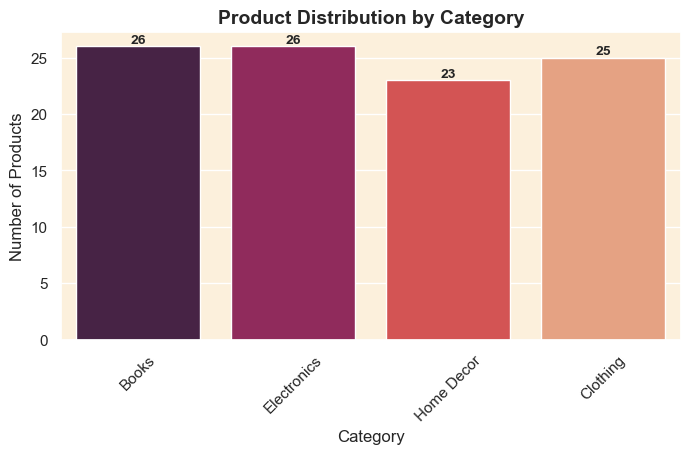

In [26]:
# Count of products by category
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=products_df, x="Category", palette="rocket")

# Add count labels on top
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Product Distribution by Category", fontsize=14, fontweight='bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.xticks(rotation=45)
plt.show()




# <b><span style='color:#ff6200'> Product Price Distribution </span></b>

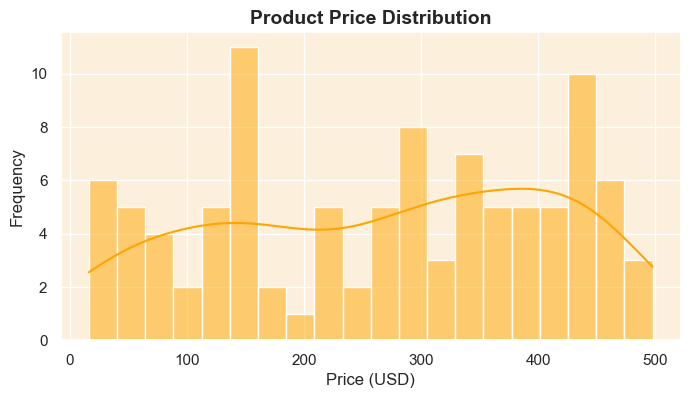

In [27]:

# Product Price Distribution
plt.figure(figsize=(8, 4))
sns.histplot(products_df['Price'], bins=20, kde=True, color='orange')
plt.title("Product Price Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Price (USD)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()


# <b><span style='color:#ff6200'> Top selling Product </span></b>

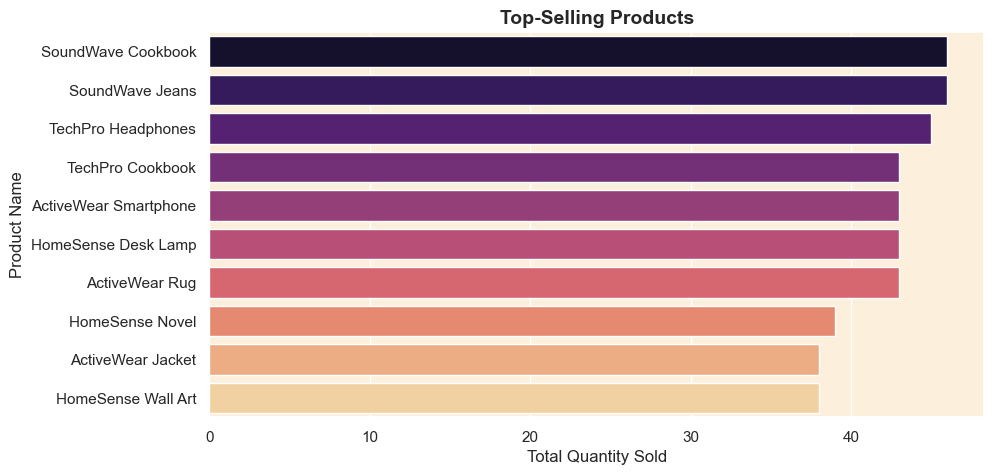

In [28]:
# Top-selling products
top_products = transactions_df.groupby('ProductID')['Quantity'].sum().nlargest(10).reset_index()
top_products = top_products.merge(products_df, on='ProductID', how='left')

# Plot top products
plt.figure(figsize=(10, 5))
sns.barplot(data=top_products, y='ProductName', x='Quantity', palette="magma")
plt.title("Top-Selling Products", fontsize=14, fontweight='bold')
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.show()



# <b><span style='color:#ff6200'> Month wise product category sale </span></b>

In [29]:
Month_wise_catogory = transactions_df[["ProductID","TotalValue","Month"]]
Month_wise_catogory = Month_wise_catogory.merge(products_df,on= "ProductID",how="left")
Month_wise_catogory

,ProductID,TotalValue,Month,ProductName,Category,Price
0,P067,300.68,2024-08,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,P067,300.68,2024-05,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,P067,300.68,2024-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,P067,601.36,2024-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,P067,902.04,2024-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...
995,P037,459.86,2024-10,SoundWave Smartwatch,Electronics,459.86
996,P037,1379.58,2024-06,SoundWave Smartwatch,Electronics,459.86
997,P037,1839.44,2024-04,SoundWave Smartwatch,Electronics,459.86
998,P037,919.72,2024-09,SoundWave Smartwatch,Electronics,459.86


In [30]:
Month_wise_catogory["Month"] = Month_wise_catogory["Month"].dt.to_timestamp()
month_category_sales = Month_wise_catogory.groupby([Month_wise_catogory["Month"].dt.month, "Category"])["TotalValue"].sum().reset_index()
month_category_sales.rename(columns={"Month": "Month_Number"}, inplace=True)
print(month_category_sales)

    Month_Number     Category  TotalValue
0              1        Books    17515.05
1              1     Clothing    17984.46
2              1  Electronics    16786.31
3              1   Home Decor    14090.57
4              2        Books    21073.17
5              2     Clothing     8091.81
6              2  Electronics     8556.44
7              2   Home Decor    13737.85
8              3        Books     9091.55
9              3     Clothing     7520.12
10             3  Electronics    15383.29
11             3   Home Decor    15833.77
12             4        Books    11270.08
13             4     Clothing    14454.24
14             4  Electronics    18390.58
15             4   Home Decor    13404.16
16             5        Books    21793.32
17             5     Clothing    17236.32
18             5  Electronics    12244.79
19             5   Home Decor    13253.31
20             6        Books    16270.05
21             6     Clothing    13217.41
22             6  Electronics     

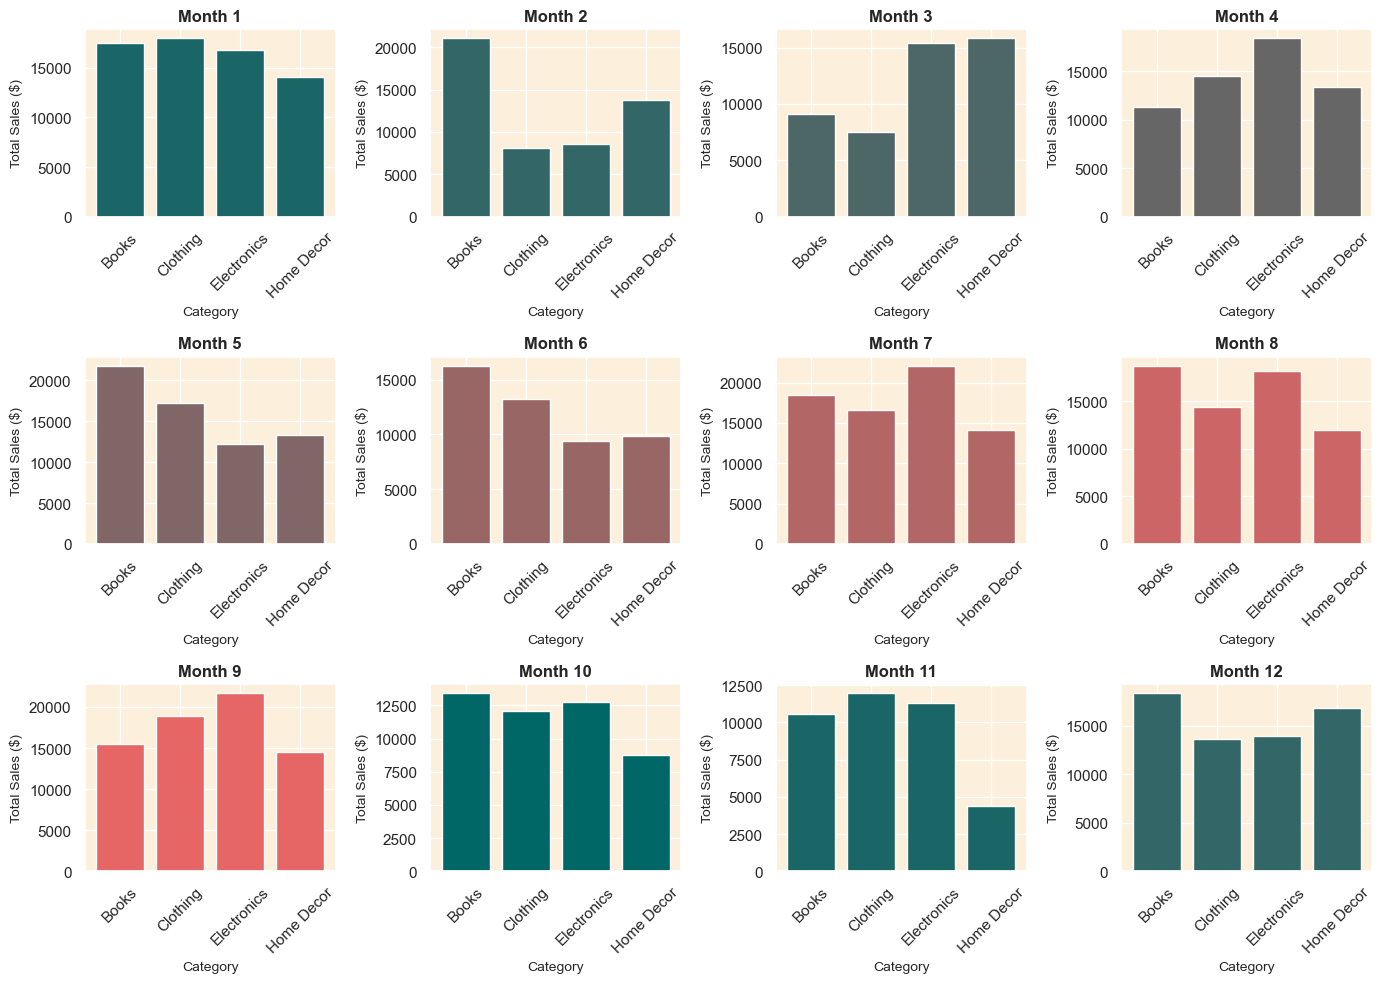

In [53]:


# Create a single figure for all subplots
plt.figure(figsize=(14, 10))  

# Loop through months 1 to 12
for i in range(1, 13):
    graph_mcs = month_category_sales[month_category_sales["Month_Number"] == i]
    
    # Create subplot (3 rows, 4 columns)
    ax = plt.subplot(3, 4, i)  
    
    # Bar plot
    ax.bar(graph_mcs["Category"], graph_mcs["TotalValue"], color= ((i/10)%1,0.4,0.4))  
    
    # Title and labels
    ax.set_title(f"Month {i}", fontsize=12, fontweight='bold')
    ax.set_xlabel("Category", fontsize=10)
    ax.set_ylabel("Total Sales ($)", fontsize=10)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()  
plt.show()

    

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">



# Monthly categorical sale

## 1. Seasonal Trends in Sales
- **Books** and **Clothing** experience peak sales in **May (Month 5)** with **Books at 21,793.32** and **Clothing at 17,236.32**.  
- **Electronics sales peak in July (Month 7)** at **22,096.51**, indicating a potential seasonal demand, possibly driven by mid-year promotions, back-to-school shopping, or festival-related purchases.  
- **Home Decor sales** perform well in **December (Month 12) at 16,863.56**, which may be attributed to holiday shopping or year-end home improvement trends.

## 2. Electronics Category Exhibits High Variability
- Sales in the electronics category fluctuate significantly, ranging from a low of **9,430.18 (Month 6)** to a high of **22,096.51 (Month 7)**.  
- This suggests that sales are heavily influenced by promotional events, seasonal trends, or external factors such as new product launches.

## 3. Home Decor Category Faces Consistent Low Performance
- The Home Decor category consistently records lower sales compared to other categories, with the lowest sales occurring in **November (Month 11) at 4,408.52**.  
- However, there is a **sharp increase in December (16,863.56)**, indicating that consumer interest in home decor is primarily driven by festive periods.

## 4. Declining Sales Towards Year-End in Some Categories
- **Books and Clothing show a decline in sales from September (Month 9) onwards**, reaching their lowest points in November before experiencing a slight recovery in December.  
- **November has the lowest total sales across all categories**, which may indicate a period of reduced consumer demand or an off-season.

## 5. Books Category is a Stable Revenue Driver
- The Books category demonstrates relatively **consistent performance throughout the year**, without extreme fluctuations.  
- The highest sales months for Books are **May (21,793.32)** and **August (18,778.53)**, potentially driven by academic and summer holiday demand.

These insights can be utilized for **inventory management, promotional strategies, and targeted marketing efforts** to optimize revenue generation across different months.



# <b><span style='color:#ff6200'> Month wise product category sale </span></b>

In [34]:
Month_wise_catogory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ProductID    1000 non-null   object        
 1   TotalValue   1000 non-null   float64       
 2   Month        1000 non-null   datetime64[ns]
 3   ProductName  1000 non-null   object        
 4   Category     1000 non-null   object        
 5   Price        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 54.7+ KB


In [35]:
df = transactions_df.merge(customers_df, on="CustomerID", how="left").merge(products_df, on="ProductID", how="left")

In [45]:

region_sales = df.groupby(['Region', 'Category']).agg({'TotalValue': 'sum'}).reset_index()
region_sales

,Region,Category,TotalValue
0,Asia,Books,33119.03
1,Asia,Clothing,49353.09
2,Asia,Electronics,35658.15
3,Asia,Home Decor,33944.70
4,Europe,Books,47464.42
5,Europe,Clothing,36335.59
6,Europe,Electronics,41562.60
7,Europe,Home Decor,40892.02
8,North America,Books,41811.99
9,North America,Clothing,38038.49


In [46]:
region_spending = df.groupby('Region').agg({'TotalValue': 'sum'}).reset_index()
region_spending


,Region,TotalValue
0,Asia,152074.97
1,Europe,166254.63
2,North America,152313.40
3,South America,219352.56


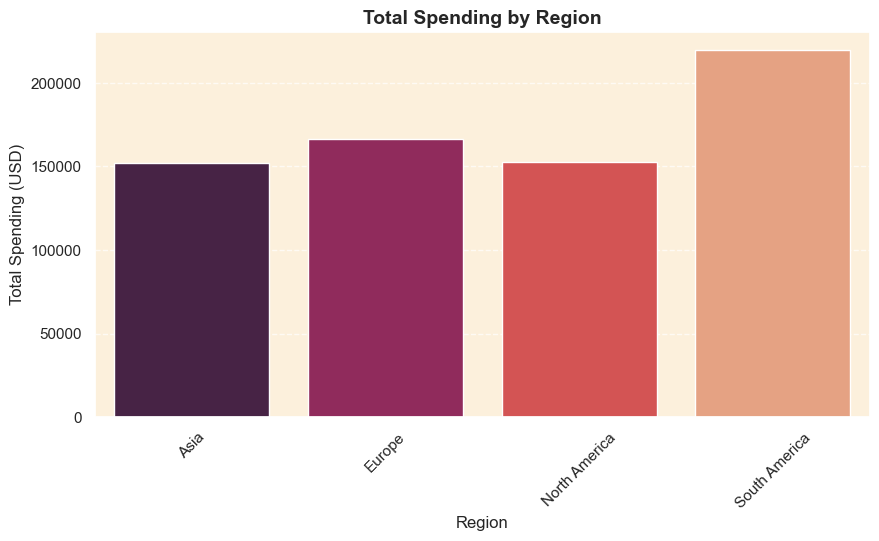

In [47]:
plt.figure(figsize=(10, 5))
sns.barplot(x=region_spending["Region"], y=region_spending["TotalValue"], palette="rocket")
plt.xticks(rotation=45)
plt.title("Total Spending by Region", fontsize=14, fontweight="bold")
plt.xlabel("Region")
plt.ylabel("Total Spending (USD)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


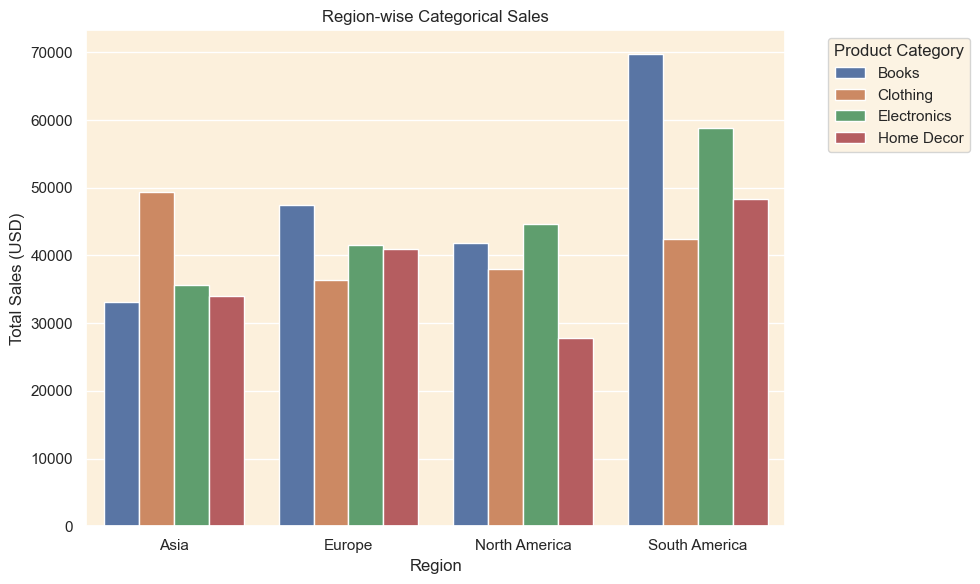

In [48]:
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(data=region_sales, x='Region', y='TotalValue', hue='Category', ci=None)

# Add title and labels
plt.title('Region-wise Categorical Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">


### Sales Insights Across Regions and Categories

- South America leads in total sales with 219,352.56, driven by strong Electronics and Books sales.  
- Books perform well globally, with South America at 69,752.03, Europe at 47,464.42, and North America at 41,811.99.  
- Clothing varies regionally, with Asia leading at 49,353.09, followed by North America and Europe at 38,038.49 and 36,335.59.  
- Electronics are strong in all regions, with South America at 58,846.32, North America at 44,716.43, and Europe at 41,562.60.  
- Home Decor performs best in Europe and South America at 40,892.02 and 48,310.72.




# <b><span style='color:#ff6200'> Signup Trends Analysis </span></b>

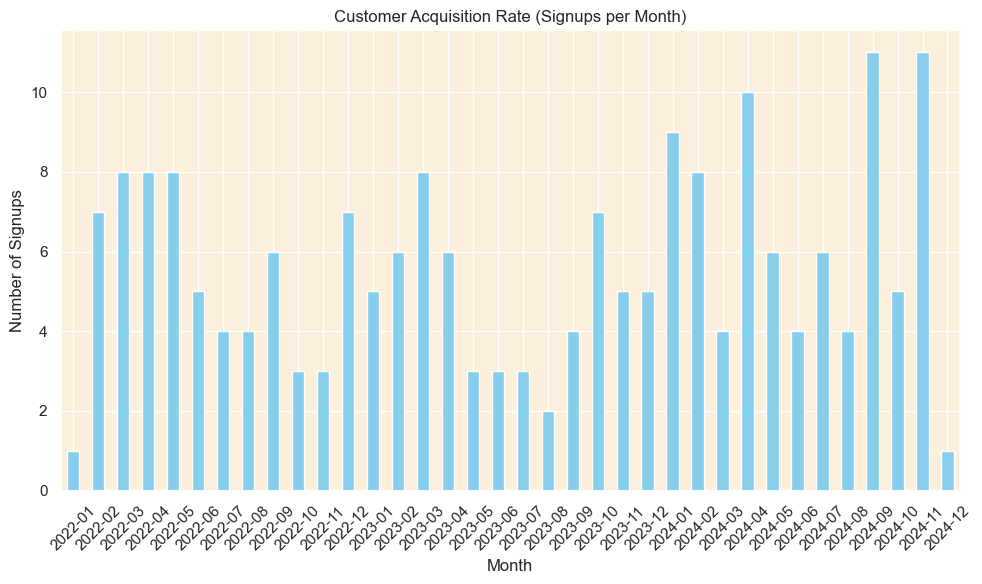

In [59]:

customers_df['SignupMonth'] = customers_df['SignupDate'].dt.to_period('M')

# Group by the SignupMonth and count the number of signups in each month
signup_per_month = customers_df.groupby('SignupMonth').size()
# Plot the Customer Acquisition Rate
plt.figure(figsize=(10,6))
signup_per_month.plot(kind='bar', color='skyblue')
plt.title('Customer Acquisition Rate (Signups per Month)')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">


### Signup Trends Analysis

- **Strong Start to 2024** – Signups peaked in **January (9)**, **February (8)**, and **April (10)**, showing high engagement early in the year.  
- **Decline in 2023** – Signups decreased in **2023**, especially in mid-year months like **May (3)**, **June (3)**, and **July (3)**, suggesting a dip in user interest.  
- **End-of-Year Fluctuations** – **November 2024 (11)** saw the highest signups, while **December 2024 (1)** recorded the lowest, likely due to seasonal factors.



# <b><span style='color:#ff6200'> Customer Lifetime value </span></b>

In [54]:

# Calculate total transaction value for each customer
customer_transactions = transactions_df.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_clv = pd.merge(customers_df[['CustomerID', 'CustomerName']], customer_transactions, on='CustomerID', how='left')


In [55]:
# Fill any NaN values with 0 (if a customer has no transactions)
customer_clv['TotalValue'].fillna(0, inplace=True)

In [56]:
# Sort customers by total transaction value to identify high-value customers
customer_clv_sorted = customer_clv.sort_values(by='TotalValue', ascending=False)


In [57]:
# Display the top 10 high-value customers
print(customer_clv_sorted[['CustomerID', 'CustomerName', 'TotalValue']].head(10))


    CustomerID          CustomerName  TotalValue
140      C0141          Paul Parsons    10673.87
53       C0054          Bruce Rhodes     8040.39
64       C0065          Gerald Hines     7663.70
155      C0156         William Adams     7634.45
81       C0082          Aimee Taylor     7572.91
187      C0188             Anna Ball     7111.32
58       C0059  Mrs. Kimberly Wright     7073.28
27       C0028         Jennifer Pena     6819.57
98       C0099          Rodney Eaton     6715.72
164      C0165         Juan Mcdaniel     6708.10


In [58]:
average_clv = customer_clv['TotalValue'].mean()
print(f"Average CLV: {average_clv}")


Average CLV: 3449.9777999999997


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">


### **Customer Lifetime Value (CLV) Insights**

1. **High-Value Customers** – The top 10 customers have a CLV significantly higher than the average, with **Paul Parsons** leading at **$10,673.87**.  
2. **Average CLV** – The overall **Average CLV** is **$3,449.98**, highlighting a strong base of mid-range customers contributing to total sales.  
3. **Targeting Opportunities** – Focusing on high-CLV customers like **Bruce Rhodes** and **Gerald Hines** can help optimize **customer retention** and **loyalty programs** for greater long-term revenue.



# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:5px 10px; padding: 20px">THANK YOU</p>